In [1]:
import warnings
import pandas as pd 
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
post_data = pd.read_csv('Posts.csv')
similarUser_df = pd.read_csv('RecommenderSystem_Output1.csv')
print(len(post_data))
print(len(similarUser_df))
del similarUser_df['index']
del similarUser_df['Unnamed: 0']
similarUser_df.head(2)

39929
39929


KeyError: 'index'

In [3]:
#Checking and dropping rows having null at Tags column
post_data.isnull().sum()
post_data = post_data.dropna(subset=['Tags'])
print(len(post_data))
#post_data

18513


In [4]:
#user_tags = post_data.groupby(['OwnerUserId','Id'])['Tags'].apply(list).reset_index()
user_tags = post_data.groupby(['OwnerUserId'])['Tags'].apply(list).reset_index()
user_post = post_data.groupby(['OwnerUserId'])['Id'].apply(list).reset_index()
user_tags['OwnerUserId']= user_tags['OwnerUserId'].astype(int)

In [5]:
#join all tags of a user in a sentence 
for i, j in user_tags.iterrows(): 
    uniqueTags = ''.join(j['Tags'])
    uniqueTags = re.findall("<(.*?)>", uniqueTags)
    uniqueTags = ' '.join(uniqueTags)
    user_tags.at[i,'Tags'] = uniqueTags

In [6]:
print(len(user_tags))
user_tags.head(2)

10531


,OwnerUserId,Tags
0,5,machine-learning
1,11,machine-learning time-series data-science-model


In [7]:
similarUserpair  = similarUser_df[['Id','most_sim_users']]
similarUserpair.head()

,Id,most_sim_users
0,-1,35592
1,1,13425
2,2,13425
3,3,18781
4,4,30


In [8]:
pair1 = similarUserpair['Id'].tolist()
pair2 = similarUserpair['most_sim_users'].tolist()

In [9]:
# # Testing 
# x=5
# y=11
# u1 = user_tags[user_tags['OwnerUserId']==x] 
# u2 = user_tags[user_tags['OwnerUserId']==y] 
# TagU1 = u1['Tags'].tolist()
# TagU2 = u2['Tags'].tolist()
# print(TagU1)
# print(TagU2)

In [10]:
%%time
TagU1=[]
TagU2=[]
PostU1=[]
PostU2=[]
notfoundUsers = []
foundUsers = []
foundUsers1 = []
foundUsers2 = []
foundUserstags1 = []
foundUserstags2 = []
foundUserspost1 = []
foundUserspost2 = []
flag=0
size=0
length=len(user_tags)

for i, j in zip(pair1,pair2):
    #print(i,j)
    size=0
    flag=0
    TagU1=['none']
    TagU2=['none']
    PostU1=['none']
    PostU2=['none']
    #TagU1.clear()
    #TagU2.clear()
    for k in user_tags['OwnerUserId']:
        size+=1
        if(k == i):
            #print("match found with i")
            u1 = user_tags[user_tags['OwnerUserId'] == i]
            p1 = user_post[user_post['OwnerUserId'] == i]
            TagU1 = u1['Tags'].tolist()
            PostU1 = p1['Id'].tolist()
            flag=1
        elif(k == j):
            #print("match found with j")
            u2 = user_tags[user_tags['OwnerUserId'] == j]
            p2 = user_post[user_post['OwnerUserId'] == j]
            TagU2 = u2['Tags'].tolist()
            PostU2 = p2['Id'].tolist()            
            flag=1 
        if(size == length):
            if(flag==1):
                #print("final in")
                foundUserstags1.extend(TagU1)
                foundUserspost1.extend(PostU1)
                foundUserstags2.extend(TagU2)
                foundUserspost2.extend(PostU2)
                user1=i
                user2=j
                foundpairs = (i,j)
                foundUsers1.append(user1)
                foundUsers2.append(user2)
                foundUsers.append(foundpairs)  
            else:
                #print("not found")
                notfoundpairs = (i,j)
                notfoundUsers.append(notfoundpairs)

Wall time: 1min 36s


In [11]:
df = pd.DataFrame(list(zip(foundUsers, foundUsers1,foundUserspost1,foundUserstags1,foundUsers2,foundUserspost2,foundUserstags2)), 
                columns =['Similar_Users', 'User1_id','User1_post','user1_Tags','user2_id','User2_post','user2_Tags'])

In [12]:
df.head(30)

,Similar_Users,User1_id,User1_post,user1_Tags,user2_id,User2_post,user2_Tags
0,"(5, 41808)",5,[5],machine-learning,41808,none,none
1,"(11, 26237)",11,[33025],machine-learning time-series data-science-model,26237,none,none
2,"(34, 31386)",34,[26631],deep-learning reinforcement-learning correlation,31386,none,none
3,"(36, 10841)",36,"[7, 1113]",education open-source bigdata clustering text-...,10841,none,none
4,"(38, 10088)",38,none,none,10088,[56129],scikit-learn learning-to-rank
5,"(43, 32164)",43,none,none,32164,[18956],python pandas categorical-data
6,"(59, 13481)",59,none,none,13481,"[8500, 8806, 8813, 9129, 9165, 9247, 10528, 19...",dataset neural-network sampling statistics cor...
7,"(62, 8644)",62,[352],visualization,8644,[5471],r
8,"(63, 73202)",63,[16],machine-learning bigdata libsvm,73202,none,none
9,"(66, 69546)",66,"[14, 26520]",data-mining definitions nlp stanford-nlp,69546,[47297],python bayesian scipy probabilistic-programming


In [13]:
print(len(notfoundUsers)) # users with similarity but not even one present with tags
print(len(foundUsers))
print(len(similarUserpair))

16008
4792
20800


Text(0.5, 1.0, 'Similar users with profile but not active,not posting,no tags')

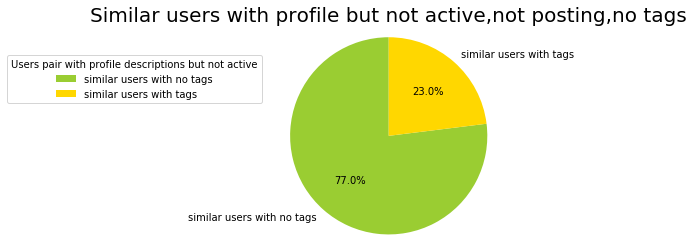

In [41]:
#df.to_csv('recommender_System.csv', header=True, index=False) 
#fig = plt.figure(figsize=(20,4))

userspair_count = [16006,4792]
name = ['similar users with no tags','similar users with tags']
colors = ['yellowgreen','gold',]
plt.pie(userspair_count, colors=colors, labels=name, startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.legend(name ,title="Users pair with profile descriptions but not active", bbox_to_anchor=(.23,0.7),loc='right', bbox_transform=plt.gcf().transFigure)
plt.title('Similar users with profile but not active,not posting,no tags', fontsize=20)